# Exploratory Data Analysis of ds2_full.csv

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm

Set style for better-looking plots

In [2]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Load data

In [3]:
# Load the entire CSV file
print("Loading CSV file... This may take a while for large files...")
df = pd.read_csv('../data/ds2_full.csv', engine='python', on_bad_lines='skip', verbose=True)
print(f"✅ Loaded {len(df):,} rows")
print(f"Columns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Loading CSV file... This may take a while for large files...
Filled 456 NA values in column title
Filled 3716 NA values in column tag
Filled 2000 NA values in column artist
Filled 570 NA values in column year
Filled 196 NA values in column views
Filled 72 NA values in column features
Filled 2389 NA values in column lyrics
Filled 25 NA values in column id
✅ Loaded 6,090,465 rows
Columns: ['title', 'tag', 'artist', 'year', 'views', 'features', 'lyrics', 'id']

First few rows:


,title,tag,artist,year,views,features,lyrics,id
0,Killa Cam,rap,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",1
1,Can I Live,rap,JAY-Z,1996,468624,{},"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",3
2,Forgive Me Father,rap,Fabolous,2003,4743,{},Maybe cause I'm eatin\nAnd these bastards fien...,4
3,Down and Out,rap,Cam'ron,2004,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}",[Produced by Kanye West and Brian Miller]\n\n[...,5
4,Fly In,rap,Lil Wayne,2005,78271,{},"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",6


## Filter and Aggregate Data

In [4]:
# Filter to only specific genres: pop, rap, rock, rb, country
target_genres = ['pop', 'rap', 'rock', 'rb', 'country']
print(f"Filtering to genres: {target_genres}...")

# Filter dataframe
df_filtered = df[df['tag'].isin(target_genres)].copy()
print(f"✅ Filtered to {len(df_filtered):,} rows (from {len(df):,} total)")

# Convert views to numeric
df_filtered['views'] = pd.to_numeric(df_filtered['views'], errors='coerce')

# Remove rows with missing artist or views
df_filtered = df_filtered[df_filtered['artist'].notna() & df_filtered['views'].notna()].copy()
print(f"✅ After removing NaN: {len(df_filtered):,} rows")

Filtering to genres: ['pop', 'rap', 'rock', 'rb', 'country']...
✅ Filtered to 5,704,674 rows (from 6,090,465 total)
✅ After removing NaN: 5,704,674 rows


In [5]:
# Aggregate total views per artist (across all filtered genres)
print("Aggregating artist views...")
artist_views = df_filtered.groupby('artist')['views'].sum().reset_index()
artist_views.columns = ['artist', 'total_views']
artist_views = artist_views.sort_values('total_views', ascending=False).reset_index(drop=True)

print(f"✅ Found {len(artist_views)} unique artists")
print(f"\nTop 10 artists by total views:")
print(artist_views.head(10).to_string(index=False))

Aggregating artist views...
✅ Found 669361 unique artists

Top 10 artists by total views:
                     artist  total_views
                      Drake    290265645
                     Eminem    199832435
Genius English Translations    166187212
                 Kanye West    165439569
             Kendrick Lamar    148426136
       Genius Romanizations    130599722
                 The Weeknd    118645383
               Taylor Swift     97866281
                    J. Cole     95490255
               XXXTENTACION     91188722


## Get Top 200 Artists

In [6]:
# Get top 200 artists by total views
top_200_artists = artist_views.head(200).copy()
print(f"✅ Selected top {len(top_200_artists)} artists")
print(f"\nTop 200 artists summary:")
print(f"  Total views range: {top_200_artists['total_views'].min():,} - {top_200_artists['total_views'].max():,}")
print(f"  Average views: {top_200_artists['total_views'].mean():,.0f}")

✅ Selected top 200 artists

Top 200 artists summary:
  Total views range: 9,705,595 - 290,265,645
  Average views: 28,040,865


## Visualizations 

Visualize top 50 artists by views

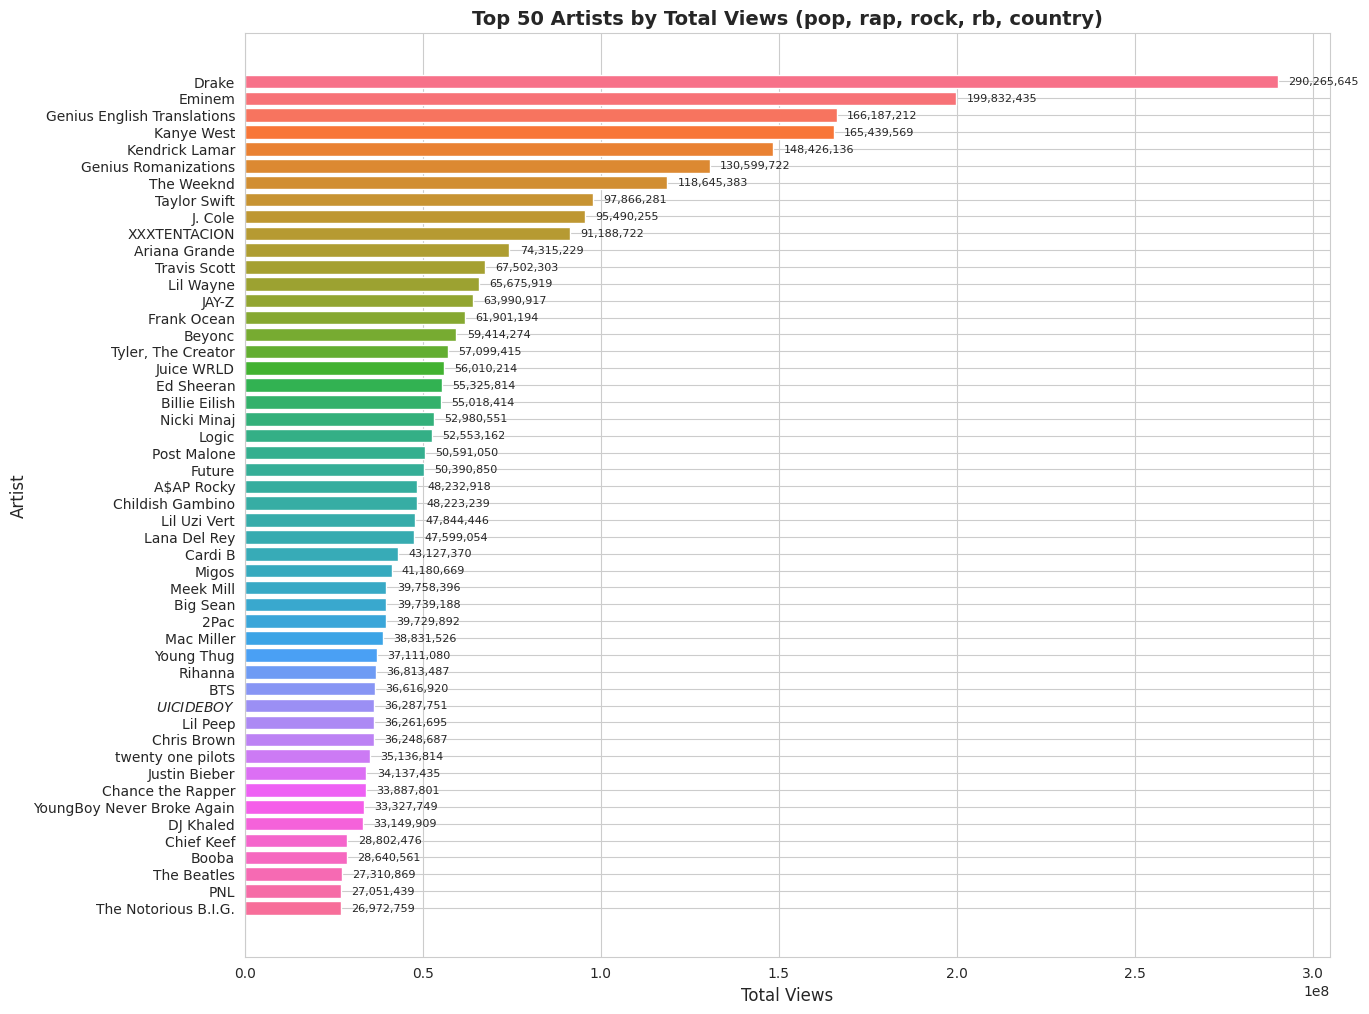

In [7]:
# Visualize top 50 artists
top_50 = top_200_artists.head(50)

plt.figure(figsize=(14, 12))
colors = sns.color_palette("husl", 50)
bars = plt.barh(range(len(top_50)), top_50['total_views'], color=colors)
plt.yticks(range(len(top_50)), top_50['artist'])
plt.xlabel('Total Views', fontsize=12)
plt.ylabel('Artist', fontsize=12)
plt.title('Top 50 Artists by Total Views (pop, rap, rock, rb, country)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels on bars
for i, (idx, row) in enumerate(top_50.iterrows()):
    plt.text(row['total_views'] + max(top_50['total_views']) * 0.01, i, 
             f"{row['total_views']:,}", va='center', fontsize=8)

## Save Results

In [8]:
# Save top 200 artists to CSV
output_file = 'top_200_artists.csv'
top_200_artists.to_csv(output_file, index=False)
print(f"✅ Saved top 200 artists to {output_file}")
print(f"\nTotal artists saved: {len(top_200_artists)}")
print(f"Total views: {top_200_artists['total_views'].sum():,}")
print(f"\nPreview of saved data:")
print(top_200_artists.head(20).to_string(index=False))

✅ Saved top 200 artists to top_200_artists.csv

Total artists saved: 200
Total views: 5,608,173,093

Preview of saved data:
                     artist  total_views
                      Drake    290265645
                     Eminem    199832435
Genius English Translations    166187212
                 Kanye West    165439569
             Kendrick Lamar    148426136
       Genius Romanizations    130599722
                 The Weeknd    118645383
               Taylor Swift     97866281
                    J. Cole     95490255
               XXXTENTACION     91188722
              Ariana Grande     74315229
               Travis Scott     67502303
                  Lil Wayne     65675919
                      JAY-Z     63990917
                Frank Ocean     61901194
                     Beyonc     59414274
         Tyler, The Creator     57099415
                 Juice WRLD     56010214
                 Ed Sheeran     55325814
              Billie Eilish     55018414
